In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math


In [2]:
data = pd.read_csv('amazon_data.csv', encoding= 'latin1')

In [3]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,01/01/98
1,1999,Acre,Janeiro,0.0,01/01/99
2,2000,Acre,Janeiro,0.0,01/01/00
3,2001,Acre,Janeiro,0.0,01/01/01
4,2002,Acre,Janeiro,0.0,01/01/02


In [4]:
data.describe(include='all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,01/01/06
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.000000,NaN
75%,2012.000000,NaN,NaN,113.000000,NaN


In [5]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,01/01/98
1,1999,Acre,Janeiro,0.0,01/01/99
2,2000,Acre,Janeiro,0.0,01/01/00
3,2001,Acre,Janeiro,0.0,01/01/01
4,2002,Acre,Janeiro,0.0,01/01/02
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,01/01/12
6450,2013,Tocantins,Dezembro,85.0,01/01/13
6451,2014,Tocantins,Dezembro,223.0,01/01/14
6452,2015,Tocantins,Dezembro,373.0,01/01/15


In [6]:
data.isna().sum()



year      0
state     0
month     0
number    0
date      0
dtype: int64

In [7]:
data = data.replace(0, np.nan)
df = data.dropna(subset=['number'])
df.describe(include= "all")

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,01/01/16
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,119.740290,NaN
std,5.649076,NaN,NaN,197.199644,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,6.000000,NaN
50%,2008.000000,NaN,NaN,33.000000,NaN
75%,2013.000000,NaN,NaN,131.000000,NaN


In [8]:
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [9]:
df

,year,state,month,number,date
5,2003,Acre,Janeiro,10.0,01/01/03
7,2005,Acre,Janeiro,12.0,01/01/05
8,2006,Acre,Janeiro,4.0,01/01/06
12,2010,Acre,Janeiro,1.0,01/01/10
17,2015,Acre,Janeiro,1.0,01/01/15
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,01/01/12
6450,2013,Tocantins,Dezembro,85.0,01/01/13
6451,2014,Tocantins,Dezembro,223.0,01/01/14
6452,2015,Tocantins,Dezembro,373.0,01/01/15


In [11]:
def new_month(old, new_m):
    df.month.replace(old, new_m,inplace=True)

new_month('Janeiro', 'January')
new_month('Fevereiro','February')
new_month('Março','March')
new_month('Abril','April')
new_month('Maio','May')
new_month('Junho','June')
new_month('Julho','July')
new_month('Agosto','August')
new_month('Setembro','September')
new_month('Outubro','October')
new_month('Novembro','November')
new_month('Dezembro','December')

In [12]:
df.head()

,year,state,month,number,date
5,2003,Acre,January,10.0,01/01/03
7,2005,Acre,January,12.0,01/01/05
8,2006,Acre,January,4.0,01/01/06
12,2010,Acre,January,1.0,01/01/10
17,2015,Acre,January,1.0,01/01/15


In [13]:
df.describe()

,year,number
count,5837.000000,5837.000000
mean,2007.834847,119.740290
std,5.649076,197.199644
min,1998.000000,1.000000
25%,2003.000000,6.000000
50%,2008.000000,33.000000
75%,2013.000000,131.000000
max,2017.000000,998.000000


In [14]:
by_state = df.groupby(['state'], as_index = False).sum()

Worst hit months: 
August
July
November
October


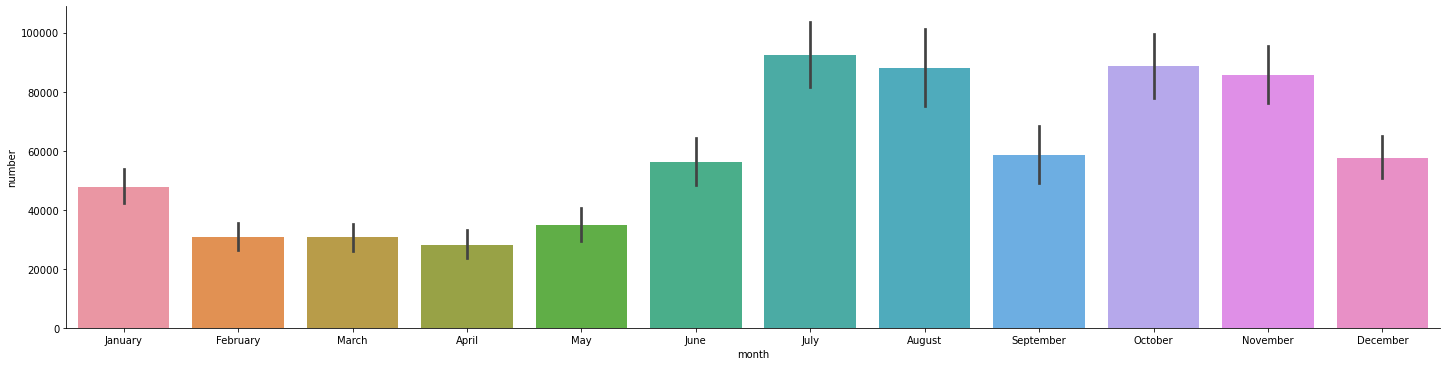

In [15]:
by_year = df.groupby(['month'], as_index = False).sum()
sns.catplot(x='month',y ='number',data=df[['month','number']], kind = 'bar',aspect= 4,estimator = sum);
worst_hit = by_year[by_year['number']>by_year['number'].mean()+by_year['number'].std()]
print('Worst hit months: ')
for i in range (len(worst_hit)):
    print(worst_hit['month'].values[i])

Worst hit states: 
Mato Grosso
Paraiba
Sao Paulo


<Figure size 3960x1440 with 0 Axes>

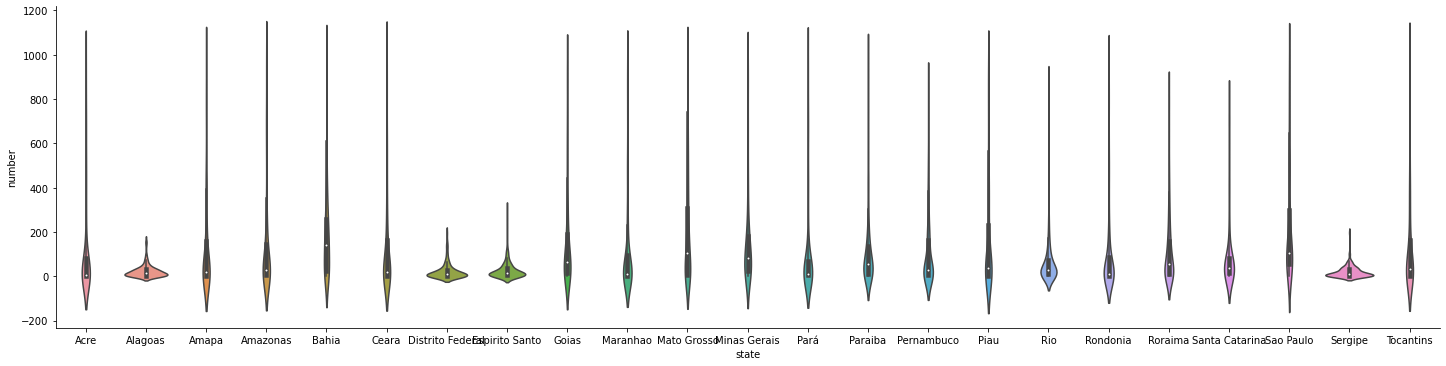

In [16]:
plt.figure(figsize=[55,20])
sns.catplot(x='state',y ='number',data=df[['state','number']], kind = 'violin',aspect= 4,estimator = sum);
worst_hit = by_state[by_state['number']>by_state['number'].mean()+by_state['number'].std()]
print('Worst hit states: ')
for i in range (len(worst_hit)):
    print(worst_hit['state'].values[i])

Worst hit years: 
2003
2015
2016


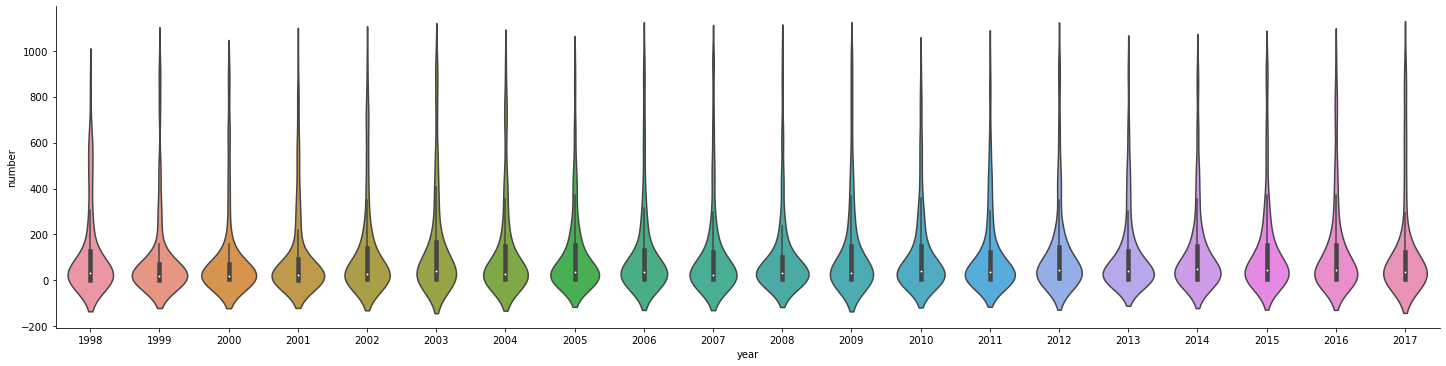

In [17]:
by_year = df.groupby(['year'], as_index = False).sum()
sns.catplot(x='year',y ='number',data=df[['year','number']], kind = 'violin',aspect= 4,estimator = sum);
worst_hit = by_year[by_year['number']>by_year['number'].mean()+by_year['number'].std()]
print('Worst hit years: ')
for i in range (len(worst_hit)):
    print(worst_hit['year'].values[i])

Worst hit years: 
2003
2015
2016


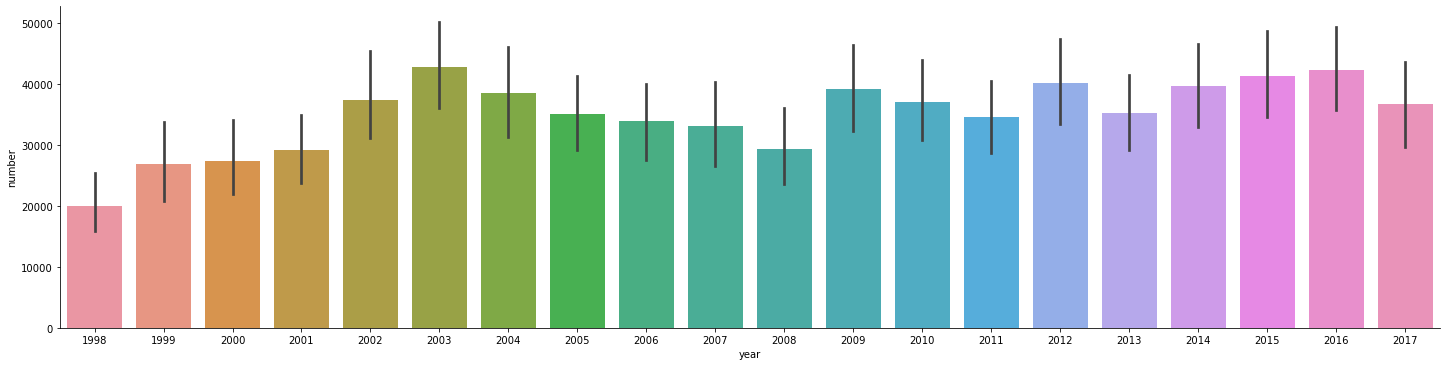

In [18]:
by_year = df.groupby(['year'], as_index = False).sum()
sns.catplot(x='year',y ='number',data=df[['year','number']], kind = 'bar',aspect= 4,estimator = sum);
worst_hit = by_year[by_year['number']>by_year['number'].mean()+by_year['number'].std()]
print('Worst hit years: ')
for i in range (len(worst_hit)):
    print(worst_hit['year'].values[i])

Text(0, 0.5, 'Number of Forest Fires')

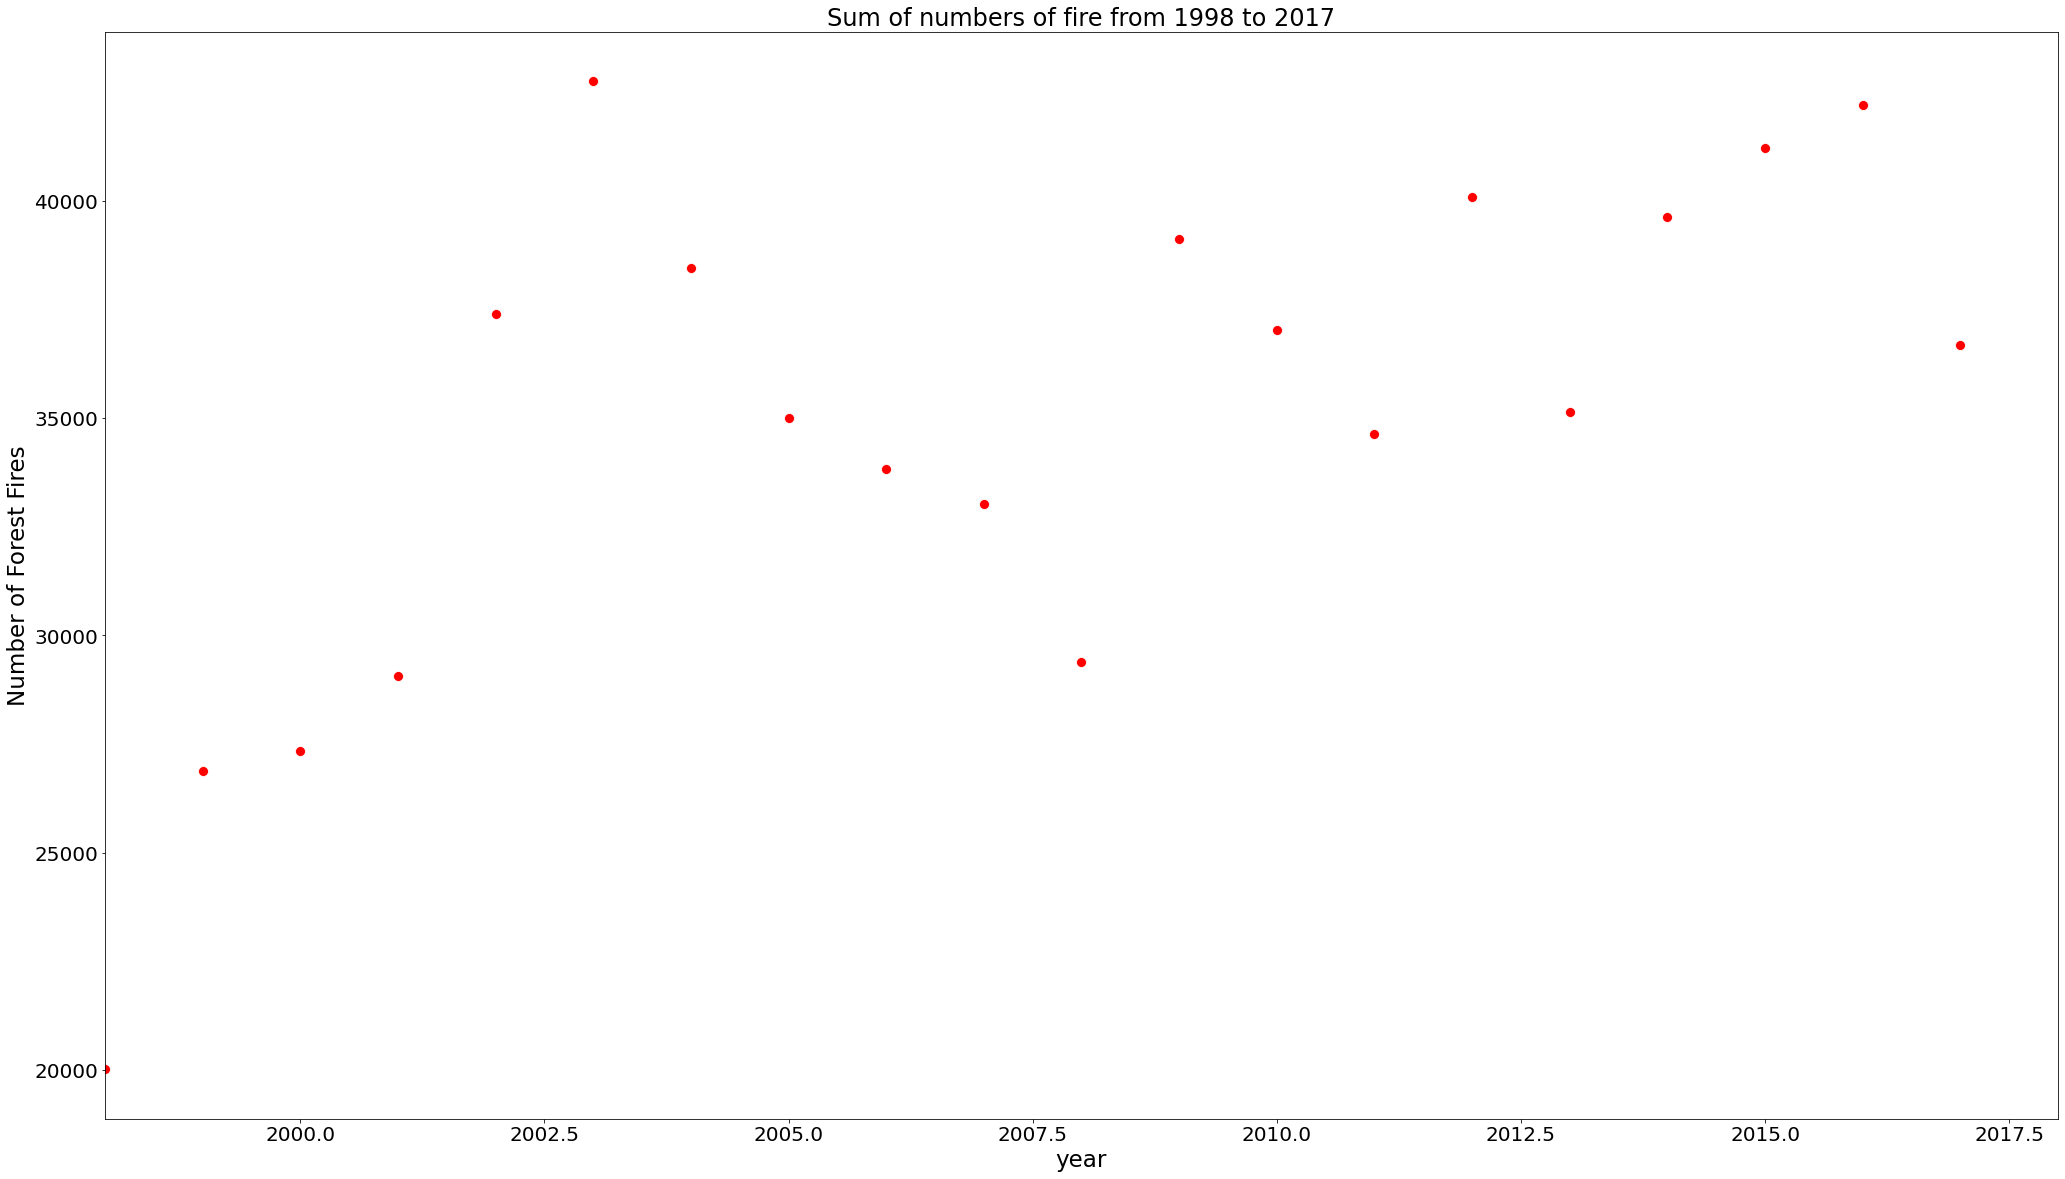

In [19]:
plt.figure(figsize=[35,20])
plt.rc('font', size=20)  
plt.xlim(1998,2018)
plt.title('Sum of numbers of fire from 1998 to 2017')
sns.scatterplot(x='year',y='number',color='red',s=100, data=by_year)
plt.xlabel('year', fontsize=23)
plt.ylabel('Number of Forest Fires', fontsize=23)

Text(0, 0.5, 'Number of Forest Fires')

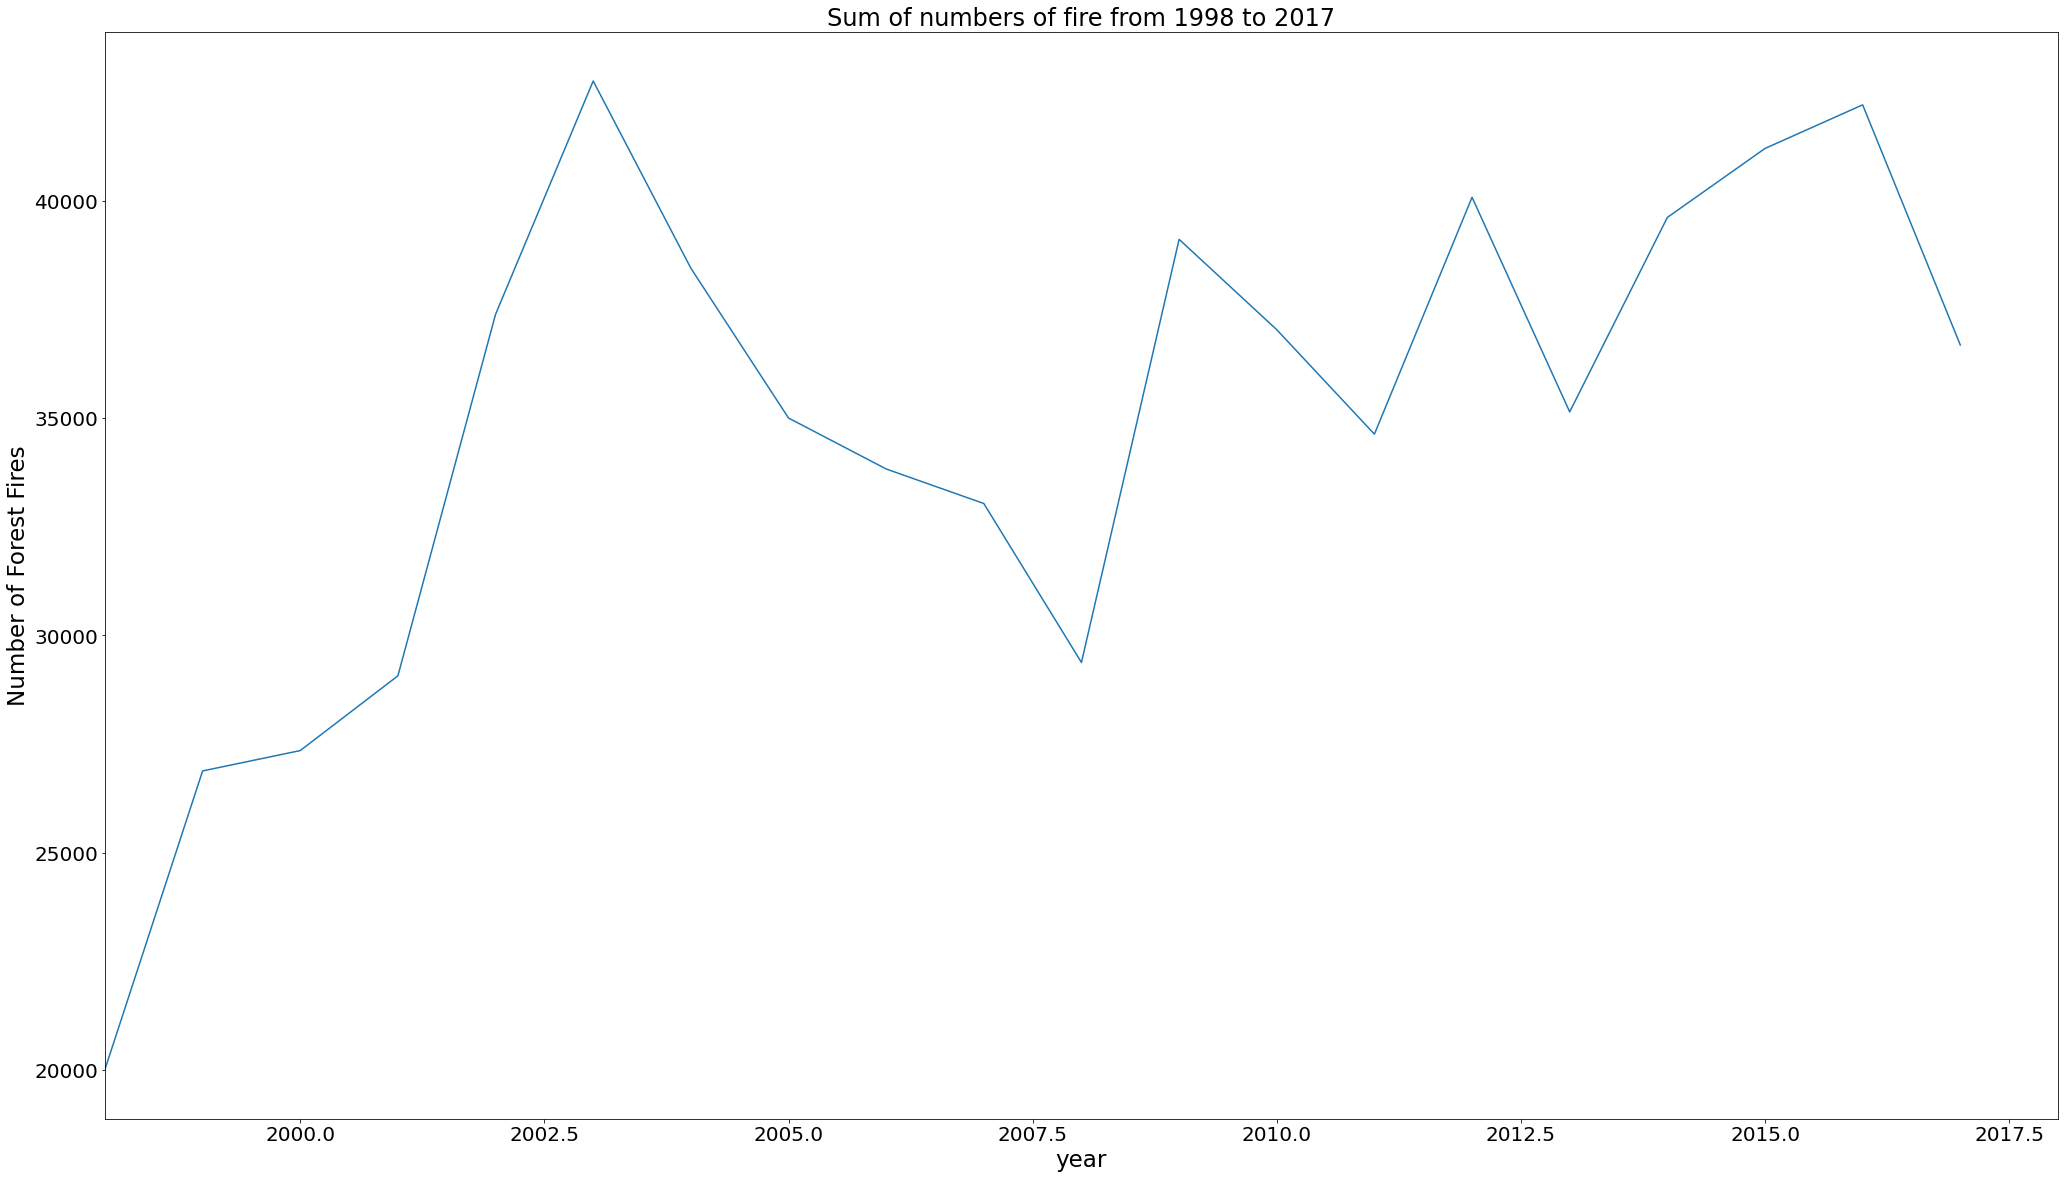

In [20]:
plt.figure(figsize=[35,20])
plt.rc('font', size=20)  
plt.xlim(1998,2018)
plt.title('Sum of numbers of fire from 1998 to 2017')
sns.lineplot(x='year',y='number', data=by_year)
plt.xlabel('year', fontsize=23)
plt.ylabel('Number of Forest Fires', fontsize=23)

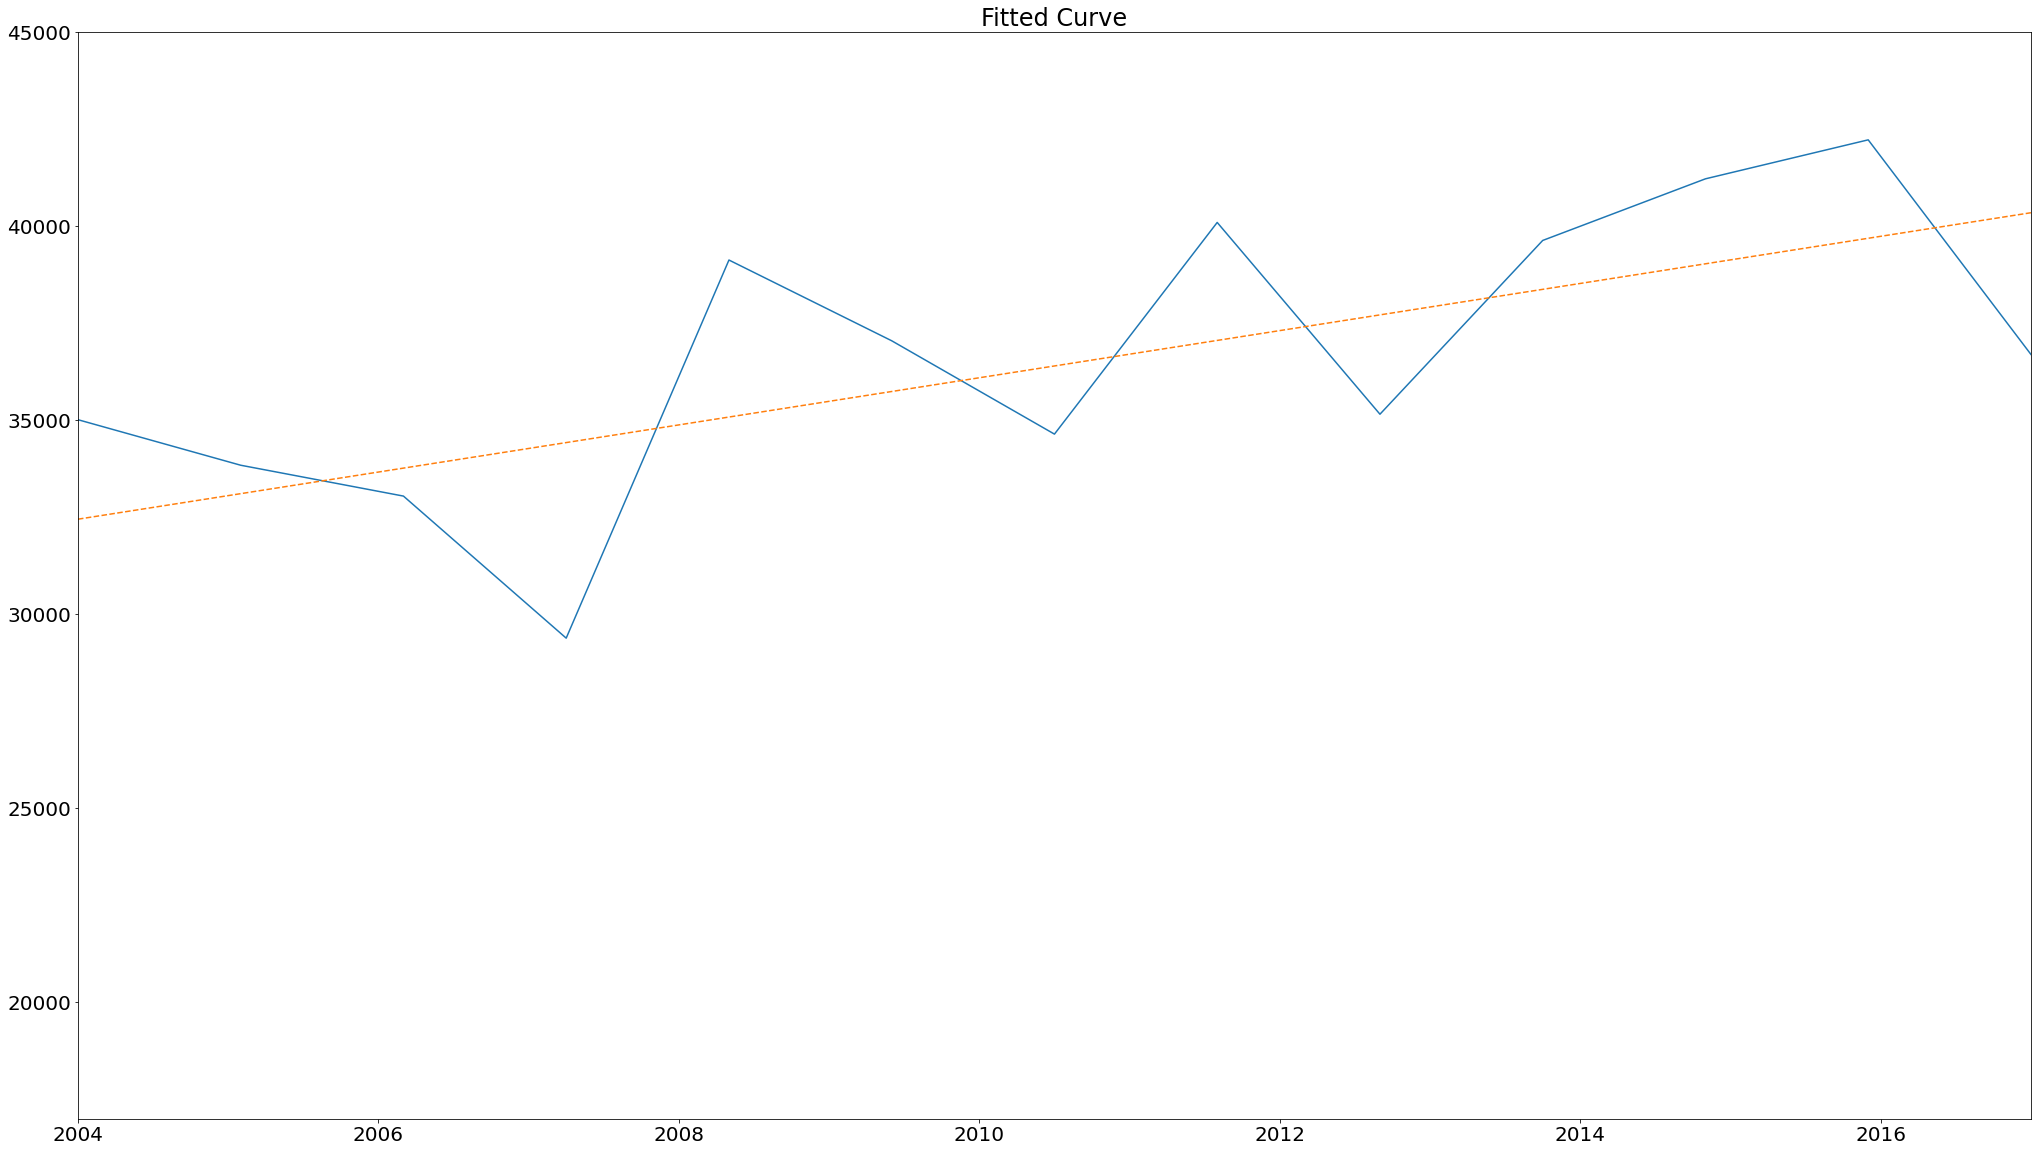

In [21]:
plt.figure(figsize=[35,20])
by_year = by_year[by_year['year']>2004]
z = np.poly1d(np.polyfit(by_year['year'],by_year['number'],1))
years = np.linspace (2004,2017,13)
plt.plot(years,by_year['number'],'-',label='Raw data')
plt.plot(years,z(years),'--',label= 'Fitted curve')
plt.xlim([2004,2017])
plt.ylim([17000,45000])
plt.title('Fitted Curve')
plt.legend
plt.show()

In [22]:
for i in range(2018,2026):
    print(i,'-', math.trunc(z(i)))

2018 - 40942
2019 - 41549
2020 - 42156
2021 - 42763
2022 - 43370
2023 - 43978
2024 - 44585
2025 - 45192
